In [1]:
import json
import os
from os.path import join

import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
from tqdm import tqdm_notebook as tqdm

import numpy as np
from itertools import cycle, islice

In [2]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 14, # fontsize for x and y labels (was 10)
    'axes.titlesize': 16,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 14, # was 10
    'xtick.labelsize': 16,
    'ytick.labelsize': 14,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [3]:
data_dir = join('..', 'data', 'stream_experiment-results')
datasets =  ['TimBL-11M','DyLDO-127M']
bisimDepths = [0,1,2]
suffix = ''

output_dir = join('..', 'plots', 'stream_exp')

In [4]:
model_dtype = pd.api.types.CategoricalDtype(categories=['Characteristic Sets', 'Weak Summary',
                                                     'SemSets', 'SchemEX', 'TermPicker', 'SchemEX+U+oI',
                                                     'SchemEX+U+pI'], ordered=True)

config_dtype = pd.api.types.CategoricalDtype(categories=['SQ - 1T', 'SQ - 100T', 'SQ - 200T', 
                                                         'CQ - 1T', 'CQ - 100T', 'CQ - 200T'], ordered=True)

config,SQ - 1T,SQ - 100T,SQ - 200T,CQ - 1T,CQ - 100T,CQ - 200T
model,,,,,,
Characteristic Sets,NaN,NaN,NaN,0.0,0.0,0.0
Weak Summary,NaN,NaN,NaN,0.0,0.0,0.0
SemSets,0.94,0.97,0.98,NaN,NaN,NaN
SchemEX,0.94,0.97,0.98,NaN,NaN,NaN
TermPicker,0.94,0.97,0.98,NaN,NaN,NaN
SchemEX+U+oI,0.85,0.91,0.93,NaN,NaN,NaN
SchemEX+U+pI,0.92,0.97,0.98,NaN,NaN,NaN


config,SQ - 1T,SQ - 100T,SQ - 200T,CQ - 1T,CQ - 100T,CQ - 200T
model,,,,,,
Characteristic Sets,NaN,NaN,NaN,0.60,0.77,0.78
Weak Summary,NaN,NaN,NaN,0.76,0.76,0.76
SemSets,0.73,0.76,0.76,0.39,0.44,0.44
SchemEX,0.73,0.75,0.76,0.39,0.44,0.46
TermPicker,0.22,0.25,0.29,0.14,0.23,0.29
SchemEX+U+oI,0.65,0.70,0.71,0.33,0.42,0.45
SchemEX+U+pI,0.80,0.80,0.85,0.49,0.50,0.65


config,SQ - 1T,SQ - 100T,SQ - 200T,CQ - 1T,CQ - 100T,CQ - 200T
model,,,,,,
Characteristic Sets,NaN,NaN,NaN,0.04,0.18,0.21
Weak Summary,NaN,NaN,NaN,0.42,0.44,0.45
SemSets,0.71,0.78,0.78,0.26,0.32,0.33
SchemEX,0.59,0.77,0.78,0.11,0.24,0.26
TermPicker,0.19,0.21,0.24,0.04,0.05,0.07
SchemEX+U+oI,0.41,0.69,0.70,0.06,0.18,0.19
SchemEX+U+pI,0.67,0.73,0.74,0.16,0.22,0.23


config,SQ - 1T,SQ - 100T,SQ - 200T,CQ - 1T,CQ - 100T,CQ - 200T
model,,,,,,
Characteristic Sets,0.00,0.00,0.00,0.0,0.0,0.0
Weak Summary,0.00,0.00,0.00,0.0,0.0,0.0
SemSets,0.56,0.57,0.58,NaN,NaN,NaN
SchemEX,0.56,0.57,0.58,NaN,NaN,NaN
TermPicker,0.56,0.57,0.58,NaN,NaN,NaN
SchemEX+U+oI,0.44,0.47,0.47,NaN,NaN,NaN
SchemEX+U+pI,0.57,0.59,0.60,NaN,NaN,NaN


config,SQ - 1T,SQ - 100T,SQ - 200T,CQ - 1T,CQ - 100T,CQ - 200T
model,,,,,,
Characteristic Sets,0.00,0.00,0.00,0.68,0.71,0.72
Weak Summary,0.00,0.00,0.00,0.89,0.92,0.89
SemSets,0.49,0.50,0.50,0.31,0.32,0.33
SchemEX,0.49,0.50,0.50,0.16,0.17,0.18
TermPicker,0.36,0.37,0.37,0.12,0.14,0.15
SchemEX+U+oI,0.41,0.43,0.43,0.13,0.13,0.14
SchemEX+U+pI,0.88,0.89,0.91,0.39,0.41,0.43


config,SQ - 1T,SQ - 100T,SQ - 200T,CQ - 1T,CQ - 100T,CQ - 200T
model,,,,,,
Characteristic Sets,0.00,0.00,0.00,0.03,0.13,0.15
Weak Summary,0.00,0.00,0.00,0.51,0.58,0.58
SemSets,0.49,0.50,0.50,0.23,0.25,0.25
SchemEX,0.49,0.49,0.50,0.08,0.09,0.09
TermPicker,0.35,0.36,0.36,0.04,0.04,0.04
SchemEX+U+oI,0.41,0.43,0.43,0.06,0.07,0.08
SchemEX+U+pI,0.57,0.59,0.60,0.07,0.08,0.09


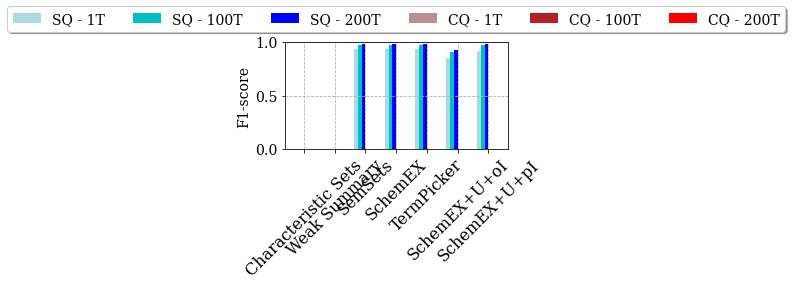

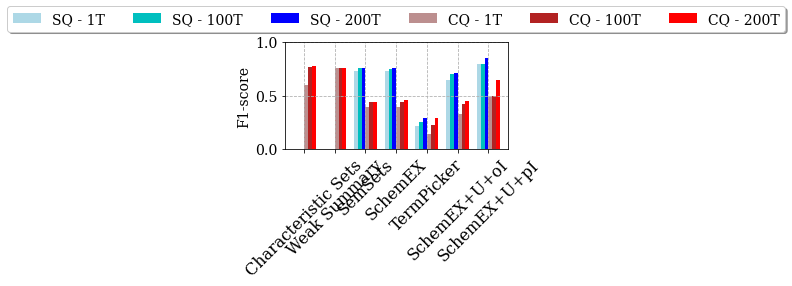

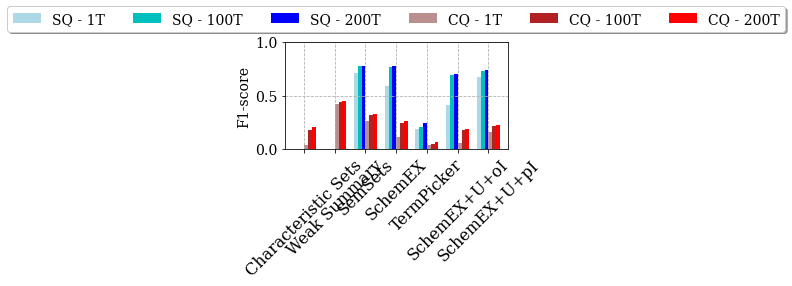

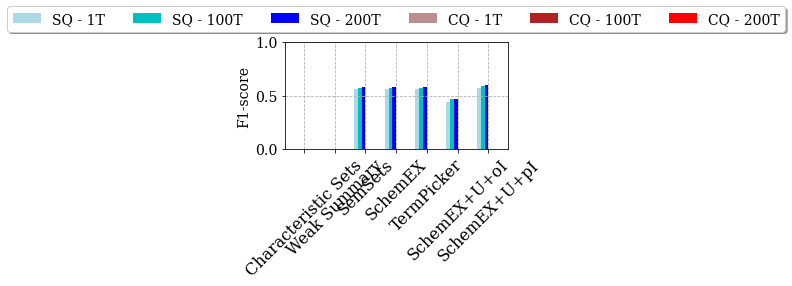

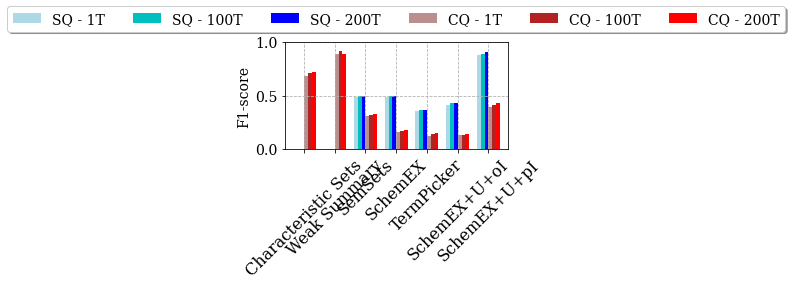

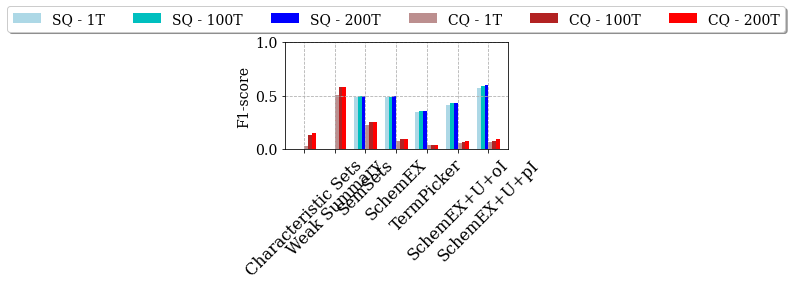

In [7]:
for dataset in datasets:
    for bisimK in bisimDepths:    
        # Load dataframe from CSV
        with open(join(data_dir, dataset +suffix + '.csv'), 'r') as f:
            df = pd.read_csv(f)
        df.head()
        # fig, ax = plt.subplots(figsize=(15,7))
        
        
        kf = df[df['k'] == bisimK].copy()
        kf.loc[(kf['model'] == 'W-Property Clique'), 'model'] = 'Weak Summary'
        kf['model'] = kf['model'].astype(model_dtype)
        kf['config'] = kf['config'].str.replace('k', 'T')
        kf['config'] = kf['config'].astype(config_dtype)
        ddf = kf.set_index(['model', 'config'])['f1']

        
        pdf = ddf.unstack()
        #print(pdf)
        pdf = pdf.sort_values(by=['model'], axis=0, ascending=True)
        
#        if bisimK != 0:
#            plt.rcParams['figure.figsize'] = [fig_width,4]
#        else:
#            plt.rcParams['figure.figsize'] = [fig_width,5.5]
        display(pdf)
        ax = pdf.plot(kind='bar', color=['lightblue', 'c', 'b', 'rosybrown', 'firebrick', 'red'], width=.75, rot=45)
        ax.set_ylim([0,1])
        # ax.legend(plot_methods.values())
        # ax.set_xticklabels([f'({int(i.left)}, {int(i.right)}]' for i in bins.cat.categories])
        ax.set_xlabel("")
        ax.set_ylabel("F1-score")
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), shadow=True, ncol=6)
        #ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), shadow=True, ncol=1)
        # plt.title(dataset + ' dataset, k=%s' % bisimK)

#        if bisimK != 0:
#        ax.get_legend().remove()
        
 
        plt.tight_layout()
        plt.grid()
        plt.savefig(output_dir + '/' + dataset + '_'+ str(bisimK) + '-approx.pdf', bbox_inches='tight', format='pdf')
        plt.savefig(output_dir + '/' + dataset + '_'+ str(bisimK) + '-approx.png', bbox_inches='tight', format='png', dpi=300)